<a href="https://colab.research.google.com/github/palak-29/MoodWing/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.tokenize import word_tokenize

# GET URL FROM USER

In [3]:
default_url_pattern = "https://www.airlinequality.com/airline-reviews/"

airline_name = input("Enter the airline's name: ")

# Check if the provided URL is complete or not, and modify if necessary
if not airline_name.startswith("http://") and not airline_name.startswith("https://"):
    base_url = f"{default_url_pattern}{airline_name}"
else:
    base_url = airline_name

pages = int(input("Enter the number of pages to scrape: "))
page_size = int(input("Enter the page size (number of reviews per page): "))

reviews = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    print(f"   ---> {len(reviews)} total reviews")

Enter the airline's name: qatar-airways
Enter the number of pages to scrape: 10
Enter the page size (number of reviews per page): 5
Scraping page 1
   ---> 5 total reviews
Scraping page 2
   ---> 10 total reviews
Scraping page 3
   ---> 15 total reviews
Scraping page 4
   ---> 20 total reviews
Scraping page 5
   ---> 25 total reviews
Scraping page 6
   ---> 30 total reviews
Scraping page 7
   ---> 35 total reviews
Scraping page 8
   ---> 40 total reviews
Scraping page 9
   ---> 45 total reviews
Scraping page 10
   ---> 50 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I was contacted in the afte...
1,Not Verified | The cabin is clean. Flight atte...
2,✅ Trip Verified | I'm a loyal Qatar Airways c...
3,"✅ Trip Verified | Checkin fast and friendly, ..."
4,✅ Trip Verified | Chose the airline due to th...


# CLEANING STRUCTURE OF DATA

In [5]:
df['reviews'] = df['reviews'].apply(lambda x: x.lower())
df.reviews= df.reviews.str.split('|',expand=True)[1]
df

,reviews
0,i was contacted in the afternoon of my outbo...
1,the cabin is clean. flight attendants are pol...
2,i'm a loyal qatar airways customer and absol...
3,"checkin fast and friendly, security and auto..."
4,chose the airline due to them operating the ...
5,travel with qatar airways is an enjoyable ex...
6,reschedule of outbound flights was quite inc...
7,"check in, security check and boarding fast a..."
8,a good plane and crew on this leg. had a mid...
9,what a disappointment this flight was. it wa...


In [6]:
import re
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,i was contacted in the afternoon of my outbo...,i was contacted in the afternoon of my outbou...
1,the cabin is clean. flight attendants are pol...,the cabin is clean flight attendants are poli...
2,i'm a loyal qatar airways customer and absol...,i m a loyal qatar airways customer and absolu...
3,"checkin fast and friendly, security and auto...",checkin fast and friendly security and automa...
4,chose the airline due to them operating the ...,chose the airline due to them operating the q...


# IMPORTING REQUIRED LIBRARIES

In [12]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## CLEANING DATA USING NLP TECHNIQUES

### 1. POS TAGGING

In [13]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

,reviews,Cleaned Reviews,POS tagged
0,i was contacted in the afternoon of my outbo...,i was contacted in the afternoon of my outbou...,"[(contacted, v), (afternoon, n), (outbound, n)..."
1,the cabin is clean. flight attendants are pol...,the cabin is clean flight attendants are poli...,"[(cabin, n), (clean, a), (flight, n), (attenda..."
2,i'm a loyal qatar airways customer and absol...,i m a loyal qatar airways customer and absolu...,"[(loyal, a), (qatar, n), (airways, n), (custom..."
3,"checkin fast and friendly, security and auto...",checkin fast and friendly security and automa...,"[(checkin, n), (fast, n), (friendly, a), (secu..."
4,chose the airline due to them operating the ...,chose the airline due to them operating the q...,"[(chose, v), (airline, n), (due, a), (operatin..."


### 2. LEMMATIZATION

In [14]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()
df[['reviews','Lemma']]

,reviews,Lemma
0,i was contacted in the afternoon of my outbo...,contact afternoon outbound flight tell overb...
1,the cabin is clean. flight attendants are pol...,cabin clean flight attendant polite seat com...
2,i'm a loyal qatar airways customer and absol...,loyal qatar airway customer absolutely love ...
3,"checkin fast and friendly, security and auto...",checkin fast friendly security automate pass...
4,chose the airline due to them operating the ...,choose airline due operate q suite route pay...
5,travel with qatar airways is an enjoyable ex...,travel qatar airway enjoyable experience air...
6,reschedule of outbound flights was quite inc...,reschedule outbound flight quite inconvenien...
7,"check in, security check and boarding fast a...",check security check board fast efficient al...
8,a good plane and crew on this leg. had a mid...,good plane crew leg middle seat assign windo...
9,what a disappointment this flight was. it wa...,disappointment flight suppose q suite substi...


## GETTING SENTIMENT OF THE CLEANED REVIEWS

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,i was contacted in the afternoon of my outbo...,i was contacted in the afternoon of my outbou...,"[(contacted, v), (afternoon, n), (outbound, n)...",contact afternoon outbound flight tell overb...,0.9433,Positive
1,the cabin is clean. flight attendants are pol...,the cabin is clean flight attendants are poli...,"[(cabin, n), (clean, a), (flight, n), (attenda...",cabin clean flight attendant polite seat com...,0.9246,Positive
2,i'm a loyal qatar airways customer and absol...,i m a loyal qatar airways customer and absolu...,"[(loyal, a), (qatar, n), (airways, n), (custom...",loyal qatar airway customer absolutely love ...,0.9537,Positive
3,"checkin fast and friendly, security and auto...",checkin fast and friendly security and automa...,"[(checkin, n), (fast, n), (friendly, a), (secu...",checkin fast friendly security automate pass...,0.9431,Positive
4,chose the airline due to them operating the ...,chose the airline due to them operating the q...,"[(chose, v), (airline, n), (due, a), (operatin...",choose airline due operate q suite route pay...,-0.7579,Negative


## OUTPUT VISUALISATION

In [17]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    33
Negative    13
Neutral      4
Name: count, dtype: int64

### 1. PIE - CHART

([<matplotlib.patches.Wedge at 0x78739a147dc0>,
 [Text(-0.5299291209321736, 0.9639373043865735, 'Positive'),
  Text(0.2735590195268535, -1.0654414403595849, 'Negative'),
  Text(1.3075873008430892, -0.3357312179018877, 'Neutral')],
 [Text(-0.2890522477811856, 0.5257839842108583, '66.0%'),
  Text(0.149214010651011, -0.5811498765597735, '26.0%'),
  Text(0.8232957079382413, -0.21138632238267002, '8.0%')])

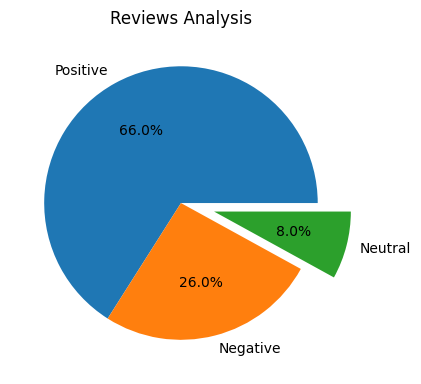

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index,explode = (0,0,0.25), autopct='%1.1f%%')

### 2. WORDCLOUD

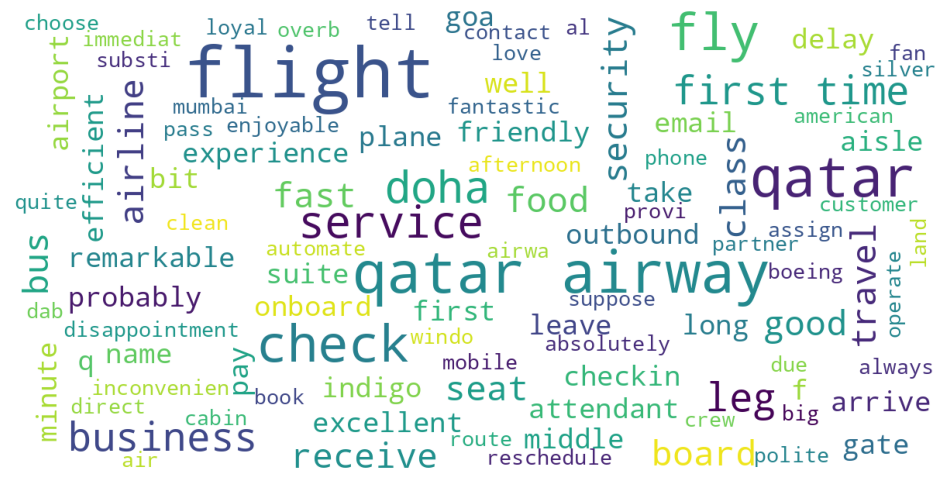

                                                Lemma  Sentiment  \
0     contact afternoon outbound flight tell overb...     0.9433   
1     cabin clean flight attendant polite seat com...     0.9246   
2     loyal qatar airway customer absolutely love ...     0.9537   
3     checkin fast friendly security automate pass...     0.9431   
4     choose airline due operate q suite route pay...    -0.7579   
5     travel qatar airway enjoyable experience air...     0.7783   
6     reschedule outbound flight quite inconvenien...    -0.8122   
7     check security check board fast efficient al...     0.2732   
8     good plane crew leg middle seat assign windo...     0.9509   
9     disappointment flight suppose q suite substi...     0.5719   
10    first time fly qatar book direct airline has...     0.9783   
11    goa doha business class boeing check goa dab...     0.7845   
12    always receive fantastic service qatar airwa...     0.9978   
13    mumbai doha indigo indigo qatar airway pro

In [19]:
df.to_csv("BA_reviews.csv")
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(df.Lemma)
clean_reviews=df['Cleaned Reviews']
def negative_review(compound):
    if compound < 0:
        return 'Negative'

df['Negative_reviews'] = df['Sentiment'].apply(negative_review)
df.head()
print(df.drop(['POS tagged' , 'reviews' , 'Cleaned Reviews' , 'Analysis'], axis=1))

In [25]:
# Negative words present in negative reviews
negative_word_frequency = Counter()
# Define a function to identify negative words
def identify_negative_words(negative_review):
    negative_words = []
    # Tokenize the review
    tokens = nltk.word_tokenize(negative_review)
    # Remove stop words
    final_tokens = [token for token in tokens if token not in stopwords]
    # Analyze each token's sentiment
    for token in final_tokens:
        sentiment = analyzer.polarity_scores(token)
        compound = sentiment['compound']
        if compound < 0:
            negative_words.append(token)
    return negative_words

# Identify negative words from negative reviews
for index, row in df[df['Negative_reviews'] == 'Negative'].iterrows():
    review = row['Cleaned Reviews']
    negative_words = identify_negative_words(review)
    # Update the frequency counter
    negative_word_frequency.update(negative_words)
    print(f"Review: {review}")
    print(f"Negative words: {negative_words}")
    print("----------------------------------------------------")

Review:  chose the airline due to them operating the q suite on this route and paid for us to sit together sadly no qsuite and average service the ground crew and lounges at doh did make up for our disappointment 
Negative words: ['sadly', 'disappointment']
----------------------------------------------------
Review:  reschedule of outbound flights was quite inconvenient for us had to contact customer service to change them at least they did a good job flights delayed between one and two hours quite mess in the flight doha saigon due to miss of buses from terminal to aircraft during the boarding process two bags broken after inspection at the arrival they took nearly one month and a half to set that they will compensate us for half of the bags value transfer still pending to be processed the case needed a follow up from my side after one month because no action taken 
Negative words: ['inconvenient', 'delayed', 'mess', 'miss', 'broken']
-------------------------------------------------

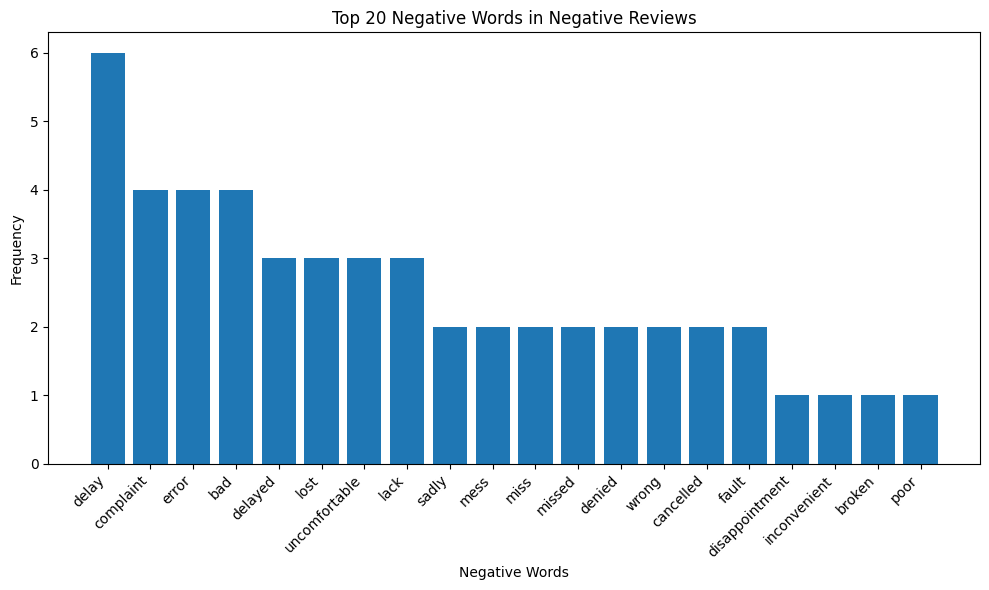

In [26]:
# Top 20 negative words
top_negative_words = dict(negative_word_frequency.most_common(20))

# Plot a bar graph for the frequency of the top 20 negative words
plt.figure(figsize=(10, 6))
plt.bar(top_negative_words.keys(), top_negative_words.values())
plt.xlabel('Negative Words')
plt.ylabel('Frequency')
plt.title('Top 20 Negative Words in Negative Reviews')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()